# Prediction of Credit Card Defaulter

# Introduction


## Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 


## Problem Statement

1.How does the default payment vary by categories of different demographic variables?

2.Which variables are the strongest predictors of default payment?

3.Build a classification model, such that it can easily predict defaulter or non-defaulter.


## Content

There are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)



In [ ]:
#https://www.kaggle.com/xuandiluo/uci-credit-cardcsv
#https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

#### Data loading and checking dimensions

In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
#load dataset
data=pd.read_csv("C:/Users/DELL/Downloads/UCI_Credit_Card.csv")
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [5]:
#Check dimensions
data.shape

(30000, 25)

Interpretation:
    
    This dataset has 300000 instances and 25 features.

In [6]:
#Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Interpretation:
    
   * This dataset is free of missing values.
   * This dataset have only  numerical features.
   * ID column refers to unique values so drop it.
  

In [7]:
#Print five summary
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Interpretation:
    
    * Some of the features has extreme values like in `LIMIT_BAL`,`BILL_AMT3`,`PAY_AMT1`,`PAY_AMT2`,`PAY_AMT3`,`PAY_AMT4`,`PAY_AMT5`,`PAY_AMT6`.
    * Mean age of the group is 35.48.

In [8]:
#Check n unique values

for col in list(data.columns):
    print(col ,':',data[col].nunique())

ID : 30000
LIMIT_BAL : 81
SEX : 2
EDUCATION : 7
MARRIAGE : 4
AGE : 56
PAY_0 : 11
PAY_2 : 11
PAY_3 : 11
PAY_4 : 11
PAY_5 : 10
PAY_6 : 10
BILL_AMT1 : 22723
BILL_AMT2 : 22346
BILL_AMT3 : 22026
BILL_AMT4 : 21548
BILL_AMT5 : 21010
BILL_AMT6 : 20604
PAY_AMT1 : 7943
PAY_AMT2 : 7899
PAY_AMT3 : 7518
PAY_AMT4 : 6937
PAY_AMT5 : 6897
PAY_AMT6 : 6939
default.payment.next.month : 2


Interpretation: ID columns has unique values so drop it.    

In [9]:
data=data.drop(columns=['ID'])
data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


### Exploratory Data Analysis

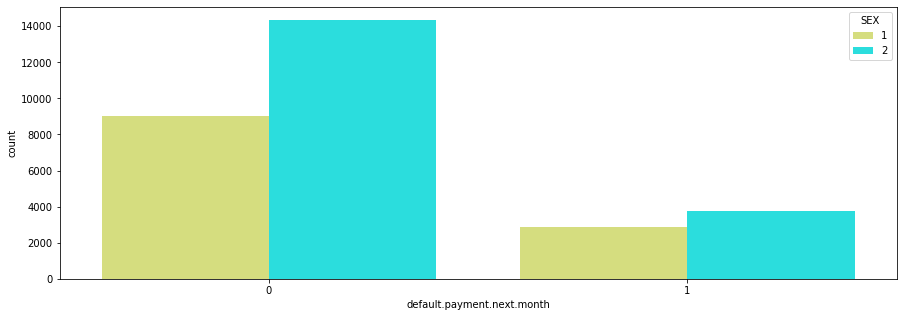

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data['default.payment.next.month'],hue=data['SEX'], saturation=1,palette="rainbow_r")

Interpretation:
    
    * From the above we can say that female counts is more in both defaulter and non defaulter.

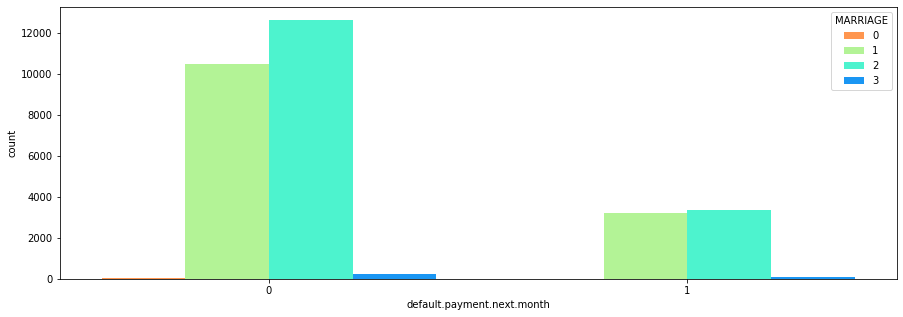

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data['default.payment.next.month'],hue=data['MARRIAGE'], saturation=1,palette="rainbow_r")

Interpretation:
    
    * In the both cases Single counts are more.

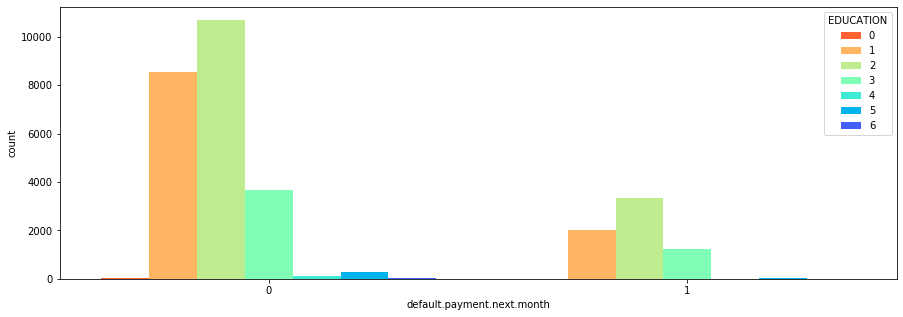

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data['default.payment.next.month'],hue=data['EDUCATION'], saturation=1,palette="rainbow_r")

Interpretation:
     
    * University studied persons are more in both defaulter and non-defaulter.

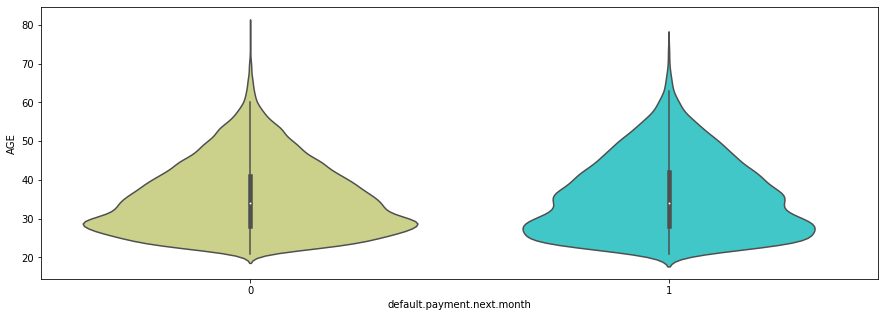

In [13]:
plt.figure(figsize=(15,5))
sns.violinplot(x=data['default.payment.next.month'],y=data['AGE'],palette="rainbow_r")

Interpretation:
    
   *  Median age of defaulter is some where around 28 years.
   *  Median age of non-defaulter is some where around 29 years.

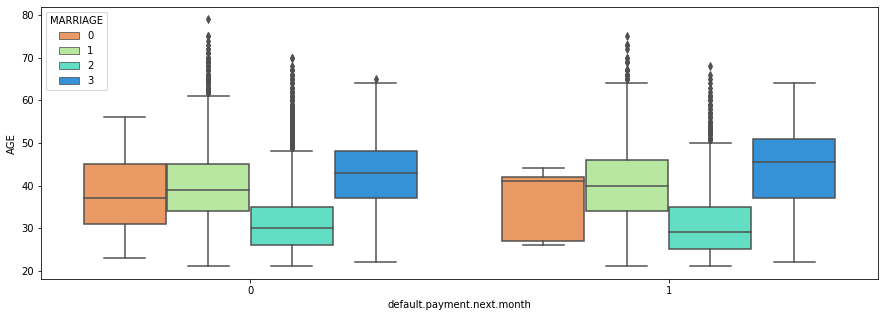

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['default.payment.next.month'],y=data['AGE'],hue=data['MARRIAGE'],palette="rainbow_r")

Interpretation:
   
   * From the above plotted graph we can easily infer the median age of single,married persons in default and non defaulter categories.

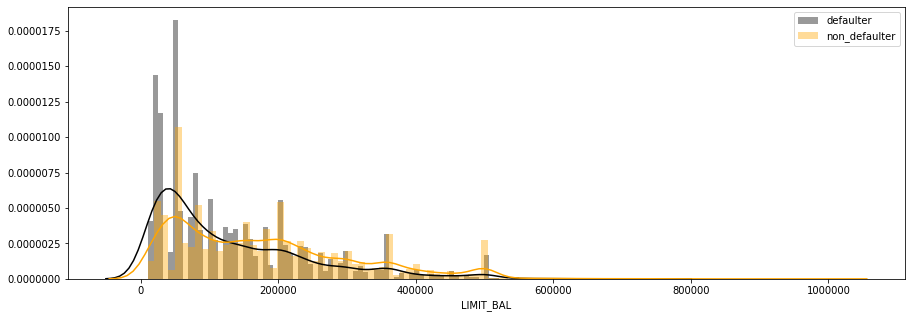

In [16]:
plt.figure(figsize=(15,5))

defaulter=data.loc[data['default.payment.next.month']==1]['LIMIT_BAL']
non_defaulter=data.loc[data['default.payment.next.month']==0]['LIMIT_BAL']

sns.distplot(defaulter,color='black',bins=100,label='defaulter')
sns.distplot(non_defaulter,color='orange',bins=100,label='non_defaulter')
plt.legend(loc='best')
plt.show()

Interpretation:
    
    * From the above graph it tell that amount in the range of 10000 to 100000 defaulter are more.
    * After 200000 non defaulters are more.

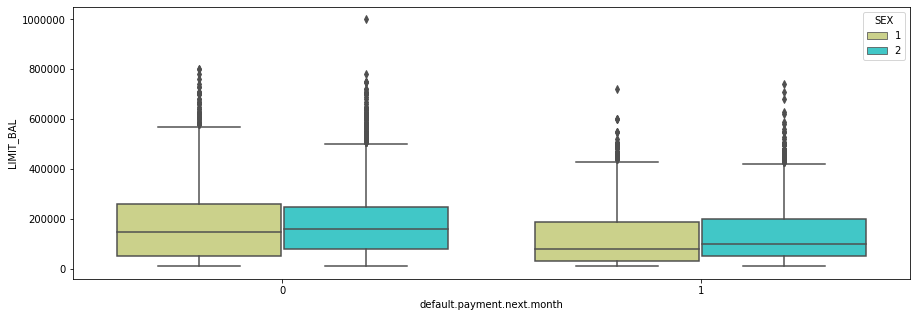

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['default.payment.next.month'],y=data['LIMIT_BAL'],hue=data['SEX'],palette="rainbow_r")

Interpretation:
    
    * Median credit limit balance for male and female in defaulter is 100000 and 120000 respectively.
    * Median credit limit balance for male and female in non_defaulter is 180000 and 185000 respectively.

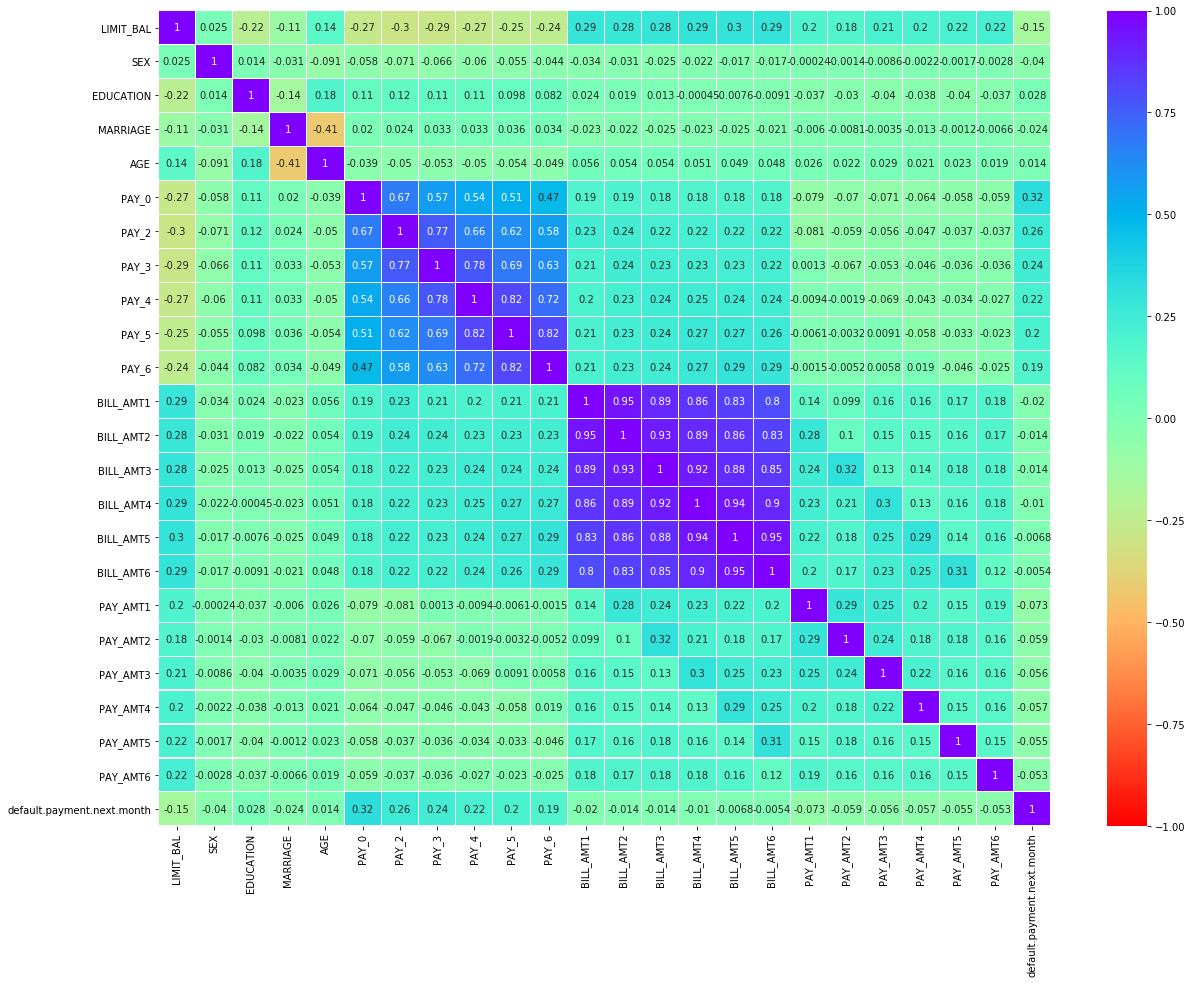

In [18]:
plt.figure(figsize=(20,15))
corr=data.corr()
sns.heatmap(corr,cmap='rainbow_r',annot=True,linewidths=.1,vmin=-1, vmax=1)

Interpretation:
    
    * From this we see that most of the features have multicollinearity issue... like in past payments and bill amounts.
    * Past payment features has positive correlation with the target feature.

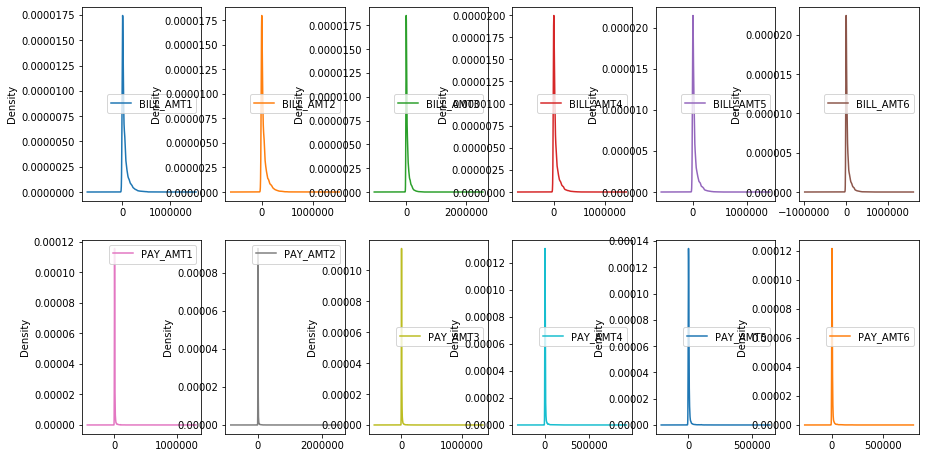

In [19]:
features=list(data.loc[:,'BILL_AMT1':'PAY_AMT6'].columns)

data[features].plot(kind='kde',subplots=True,sharex=False,sharey=False,layout=(6,6),figsize=(15,25))
plt.show()

Interpretation:
    
    * Here all features mean value is zero and features are not normal distributed.

### Data Preprocessing

#### Missing value Treatment

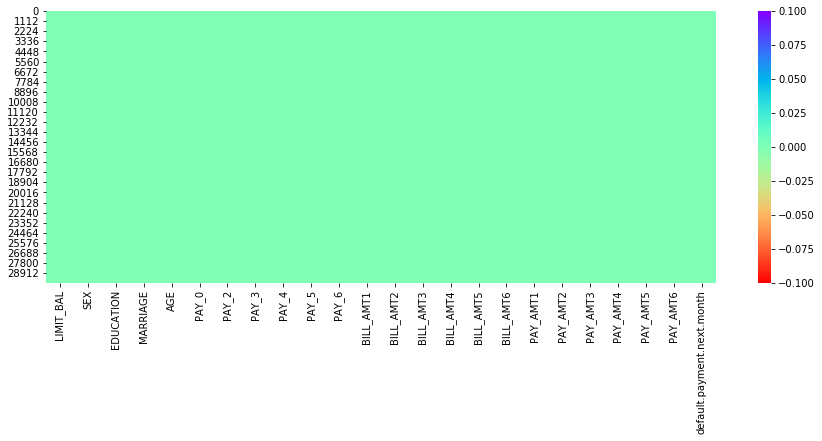

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(),cmap='rainbow_r')

Interpretation:
    
    * Dataset is free of missing values.

In [21]:
data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


#### Check Outliers Presence

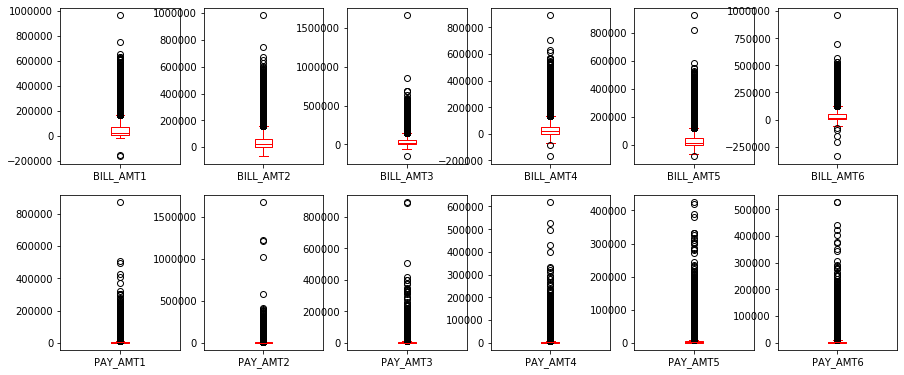

In [22]:
features=list(data.loc[:,'BILL_AMT1':'PAY_AMT6'].columns)

data[features].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(6,6),color='r',figsize=(15,20))
plt.show()

Interpretation:
    
    * Above figure infers that all the features median value is zero..

#### Feature Engineering and Extraction

In [23]:
for col in list(data[['EDUCATION','MARRIAGE']].columns):  
    print(col,':',data[col].nunique())


EDUCATION : 7
MARRIAGE : 4


Interpretation:
    
    * As per data description EDUCATION has 4 classes, MARRIAGE has 3, but in dataset EDUCATION,MARRIAGE has more classes than predefined classes. So, do feature engineering.


In [24]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
#replace all 0's with the 3 
data['MARRIAGE']=data['MARRIAGE'].replace(0,3)
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [26]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [27]:
data.groupby(['EDUCATION'])['LIMIT_BAL'].mean()

EDUCATION
0    217142.857143
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    168164.285714
6    148235.294118
Name: LIMIT_BAL, dtype: float64

In [28]:
dict={0:4,5:2,6:2}
data['EDUCATION']=data['EDUCATION'].replace(dict)
data['EDUCATION'].value_counts()

2    14361
1    10585
3     4917
4      137
Name: EDUCATION, dtype: int64

#### Check is there any Imbalance in target feature

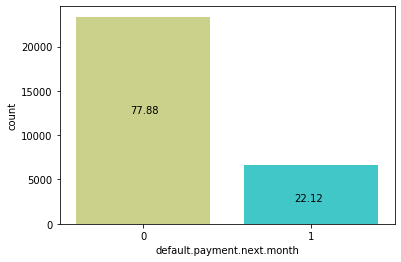

In [29]:
sns.countplot(data['default.payment.next.month'],palette='rainbow_r')
plt.text(x=-0.08,y=12500,s=str(len(data[data['default.payment.next.month']==0])*100/len(data)))
plt.text(x=0.9,y=2500,s=str(len(data[data['default.payment.next.month']==1])*100/len(data)))
plt.show()

Interpretation:
    
   * Yes! this target variable has imbalance issue.. so `SMOTE` technique to overcome imbalance issue.

In [30]:
#Split the features into independent and dependent 

X=data.drop(columns=['default.payment.next.month'])
y=data['default.payment.next.month']


In [31]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=20,test_size=0.2)

In [32]:
#SMOTE Technique
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain_smote,ytrain_smote=sm.fit_resample(xtrain,ytrain)

print('Original Dimensions :','\n', ytrain.value_counts())
print('\n')
print('After using smote Dimensions :','\n', ytrain_smote.value_counts())

Original Dimensions : 
 0    18701
1     5299
Name: default.payment.next.month, dtype: int64


After using smote Dimensions : 
 1    18701
0    18701
Name: default.payment.next.month, dtype: int64


Interpretation:

    * Now both classes have the same number of observations.

### Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#base model-1

In [35]:
from sklearn.metrics import accuracy_score
classifier=[LogisticRegression(),
           DecisionTreeClassifier(),
           KNeighborsClassifier(),
           GaussianNB(),
           SVC()]

for item in classifier:
    print('Classifier :',item)
    clf=item
    model=clf.fit(xtrain_smote,ytrain_smote)
    pred=model.predict(xtest)
    print('accuracy score :',accuracy_score(ytest,pred),'\n')

Classifier : LogisticRegression()


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy score : 0.6856666666666666 

Classifier : DecisionTreeClassifier()
accuracy score : 0.6865 

Classifier : KNeighborsClassifier()
accuracy score : 0.6101666666666666 

Classifier : GaussianNB()
accuracy score : 0.3255 

Classifier : SVC()
accuracy score : 0.5723333333333334 



Interpretation:
     
    * From the outputs we can see that Decision tree model is giving best result.

In [ ]:
base model-2

In [36]:
#base learner is Decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [37]:
classifier=[RandomForestClassifier(),
           AdaBoostClassifier(),
           GradientBoostingClassifier(),
           XGBClassifier()]
           

for item in classifier:
    print('Classifier :',item)
    clf=item
    model=clf.fit(xtrain_smote,ytrain_smote)
    pred=model.predict(xtest)
    print('accuracy score :',accuracy_score(ytest,pred),'\n')

Classifier : RandomForestClassifier()
accuracy score : 0.7896666666666666 

Classifier : AdaBoostClassifier()
accuracy score : 0.731 

Classifier : GradientBoostingClassifier()
accuracy score : 0.7623333333333333 

Classifier : XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
accuracy score : 0.7723333333333333 



Interpretation:
    
    * RandomForestClassifier and XGBClassifier are giving the best result.. So consider these classifier for further procesing.

In [ ]:
#model-3 Randomforest with tuning

#### RandomForestClassifier -Hyperparameter Tuning

In [249]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':np.arange(50,300,50),
       'criterion':['entropy','gini'],
       'max_depth':np.arange(4,8,1),
       'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
       'min_samples_split':np.arange(2,5,1),
       'max_depth':[3,4,5,6,7,8]}

model=RandomForestClassifier(random_state=20)
grid=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1)

grid.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([ 50, 100, 150, 200, 250])})

In [250]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 2, 'n_estimators': 150}


In [38]:
rf_clf=RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=4,min_samples_leaf=0.1,min_samples_split=2,random_state=20)
rf_clf.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=0.1,
                       n_estimators=150, random_state=20)

In [39]:
from sklearn.metrics import accuracy_score

ypred=rf_clf.predict(xtest)

print('Train Accuracy_score is :',rf_clf.score(xtrain_smote,ytrain_smote))
print('Test Accuracy_score is :',accuracy_score(ytest,ypred))

Train Accuracy_score is : 0.7198278166942944
Test Accuracy_score is : 0.7255


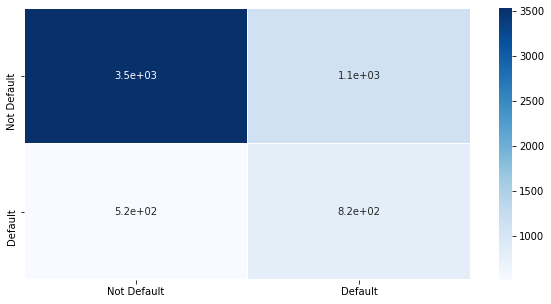

In [40]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4663
           1       0.42      0.61      0.50      1337

    accuracy                           0.73      6000
   macro avg       0.65      0.69      0.66      6000
weighted avg       0.77      0.73      0.74      6000



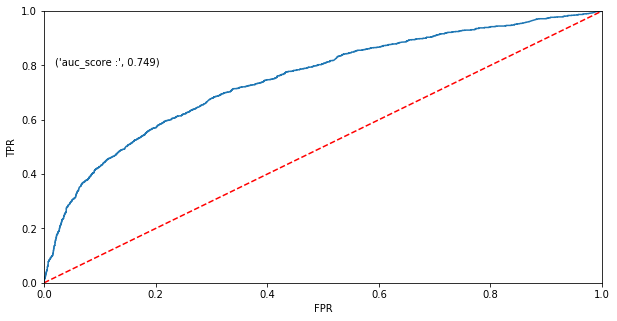

In [42]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,5))
ypred_prob=rf_clf.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob[:,1]),3)))
plt.show()

In [43]:
from sklearn.metrics import cohen_kappa_score
print('Cohen kappa score is :',cohen_kappa_score(ytest,ypred))

Cohen kappa score is : 0.31915665267040516


Interpretation: This score indicates that fair agreement between the actual and predict values.

#### Reduce Type-1 error and Type-2 error

#### Youden's index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.

Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR)

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [44]:
youden_table=pd.DataFrame({'TPR':tpr,'FPR':fpr,'THRESOLD':thresold})
print(youden_table.head(5))

        TPR       FPR  THRESOLD
0  0.000000  0.000000  1.761458
1  0.000748  0.000000  0.761458
2  0.002992  0.000000  0.759890
3  0.002992  0.000214  0.759772
4  0.005984  0.000214  0.757060


In [45]:
youden_table['DIFFERENCE']=youden_table['TPR']-youden_table['FPR']
youden_table=youden_table.sort_values('DIFFERENCE',ascending=False).reset_index(drop = True)

In [46]:
youden_table.head(5)

,TPR,FPR,THRESOLD,DIFFERENCE
0,0.684368,0.304739,0.481522,0.379629
1,0.683620,0.304096,0.481723,0.379524
2,0.594615,0.215526,0.506908,0.379088
3,0.682872,0.303882,0.481863,0.378990
4,0.683620,0.304739,0.481530,0.378881


Interpretation:
    
    *As we can see that thresold 0.49 has maximum  difference of 0.377914 so consider this thresold as a cutoff value. 

In [47]:
ypred_youden=[1 if x > 0.490874 else 0 for x in ypred_prob[:,1]]
ypred_youden[:10]

[1, 1, 1, 1, 0, 0, 0, 0, 0, 1]

In [48]:
ypred_prob[:,1][:10]

array([0.56574593, 0.53583785, 0.50647856, 0.66485226, 0.40652024,
       0.32593259, 0.48602939, 0.48353822, 0.4100304 , 0.54488103])

In [49]:
ypred[:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

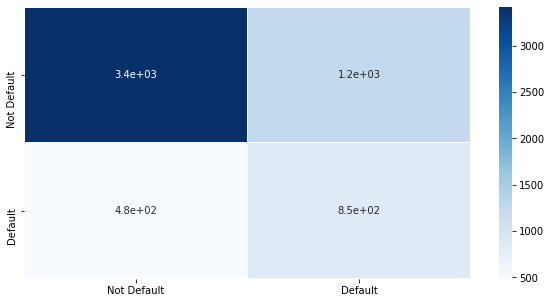

In [50]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,ypred_youden)
plt.figure(figsize=(10,5))
sns.heatmap(cm,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

In [51]:
print('Cohen kappa score is :',cohen_kappa_score(ytest,ypred_youden))

Cohen kappa score is : 0.3083976024450218


Interpretation: This score indicates that fair agreement between the actual and predict values.

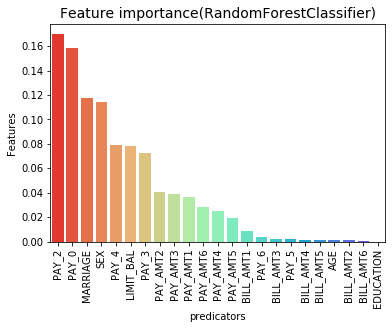

In [52]:
rf_clf.feature_importances_
imp_features=pd.DataFrame({'predicators':xtrain.columns,'Features':rf_clf.feature_importances_})
imp_features=imp_features.sort_values(by='Features',ascending=False)

sns.barplot(x=imp_features['predicators'],y=imp_features['Features'],palette='rainbow_r')
plt.xticks(rotation=90)
plt.title('Feature importance(RandomForestClassifier)',fontsize=14)
plt.show()

Interpretation:
    
`PAY_2`,`PAY_0`,`SEX`,`MARRIAGE`,`LIMIT_BAL`,`PAY_4`,`PAY_3`,`PAY_AMT1`,`PAY_AMT2`,`PAY_AMT3`,`PAY_AMT4`,`PAY_AMT5`,`PAY_AMT6` These features are more important.

In [264]:
from sklearn.metrics import f1_score

score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy_score', 'F1_score', 'AUC score'])

RandomForestClassifier_hyperparameter = pd.Series({
                     'Model_Name': "RandomForestClassifier",
                     'Accuracy_score':accuracy_score(ytest,ypred),
                     'F1_score':f1_score(ytest,ypred) ,
                     'AUC score':0.749 })
       
                  

score_card = score_card.append(RandomForestClassifier_hyperparameter, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.7255,0.49924,0.749


#### XGBOOST Classifier 

In [ ]:
#model-4 XGBoost classifier model without considering 'smote' technique

In [53]:
#Build a model without considering 'smote' technique
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [55]:
y_pred = xgb_clf.predict(xtest)

In [56]:
from sklearn.metrics import accuracy_score

print('XGBoost model without smote accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

XGBoost model without smote accuracy score: 0.8127


In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4663
           1       0.63      0.38      0.47      1337

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [58]:
#print confusionmatrix
confusion_matrix(ytest,y_pred)

array([[4369,  294],
       [ 830,  507]], dtype=int64)

In [59]:
print('Cohen kappa score for model without smote is :',cohen_kappa_score(ytest,y_pred))

Cohen kappa score for model without smote is : 0.368901321208453


In [60]:
ypred_prob=xgb_clf.predict_proba(xtest)[:,1]
print('auc_score for model without smote is :',roc_auc_score(ytest,ypred_prob))

auc_score for model without smote is : 0.7662365659352073


In [ ]:
#model-5 XGBoost classifier model with considering 'smote' technique

In [61]:
#Build a model with considering 'smote' technique
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
xgb_clf1 = XGBClassifier(**params)
xgb_clf1.fit(xtrain_smote,ytrain_smote)
print(xgb_clf1)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [62]:
y_pred1 = xgb_clf1.predict(xtest)
print('XGBoost model with smote accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred1)))

XGBoost model with smote accuracy score: 0.7617


In [63]:
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4663
           1       0.47      0.49      0.48      1337

    accuracy                           0.76      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.77      0.76      0.76      6000



In [64]:
confusion_matrix(ytest,y_pred1)

array([[3916,  747],
       [ 683,  654]], dtype=int64)

In [65]:
print('Cohen kappa score for model with smote is :',cohen_kappa_score(ytest,y_pred1))

Cohen kappa score for model with smote is : 0.32343594239459206


In [66]:
ypred_prob_smote=xgb_clf1.predict_proba(xtest)[:,1]
print('auc_score for model with smote is :',roc_auc_score(ytest,ypred_prob_smote))

auc_score for model with smote is : 0.7258164377791654


Interpretation:
    
    * From above both models we can see that model without smote techniques gives best result [bcoz in XGboost it have inbuilt imbalance treatment].

#### XGBOOST Classifier -Hyperparameter Tuning

In [ ]:
#model-6 XGBoost model with hyperparameter

In [ ]:
from xgboost import XGBClassifier

params={'learning_rate':np.arange(0.1,0.5,0.1),
       'n_estimators':[200,300,400],
       'max_depth':np.arange(3,8,1),
       'min_child_weight':np.arange(1,5,1),
       'gamma':[0],
       'subsample':np.arange(0.5,1.0,0.1),
       'objective':['binary:logistic']
       }

model=XGBClassifier(random_state=20)
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(xtrain,ytrain)

In [115]:
#grid_search.best_params_

In [116]:
#XGBoost model with parameter tuning
xgb_model=XGBClassifier(objective='binary:logistic',n_estimators=200,learning_rate=0.2,max_depth=3,gamma=0,subsample=0.5,reg_lambda=0.2,scale_pos_weight=1,random_state=20)
xgb_model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=20,
              reg_alpha=0, reg_lambda=0.2, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
ypred_xgb=xgb_model.predict(xtest)
print('Accuracy score(Test) for XGBoost model-1 with parameters tuning :',accuracy_score(ytest, ypred_xgb))

Accuracy score(Test) for XGBoost model-1 with parameters tuning : 0.8181666666666667


In [124]:
#tuning model-2
xgb_model2=XGBClassifier(objective='binary:logistic',n_estimators=200,learning_rate=0.1,max_depth=6,gamma=0.0,subsample=0.6,reg_lambda=0.03,reg_alpha=12,scale_pos_weight=1,random_state=20)
xgb_model2.fit(xtrain,ytrain)
ypred_xgb2=xgb_model2.predict(xtest)
print('Accuracy score(Train) for XGBoost model-2 with parameters tuning : ',xgb_model2.score(xtrain,ytrain))
print('Accuracy score(Test) for XGBoost model-2 with parameters tuning :',accuracy_score(ytest, ypred_xgb2))

Accuracy score(Train) for XGBoost model-2 with parameters tuning :  0.8409166666666666
Accuracy score(Test) for XGBoost model-2 with parameters tuning : 0.821


In [125]:
#Print Classification report
print(classification_report(ytest,ypred_xgb2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.67      0.39      0.49      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



Interpretation:
    
    * F1 score and Accuracy score are got to increased compared previous model(RandomForestClassifier).

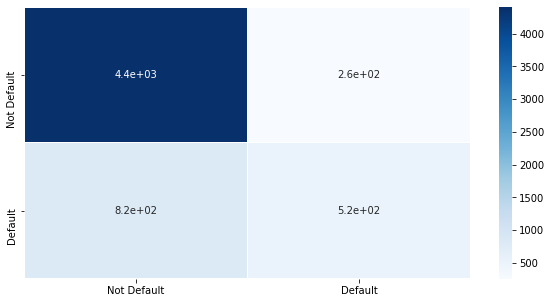

In [128]:
#Check confusion matrix
cm_xgb=confusion_matrix(ytest,ypred_xgb2)

plt.figure(figsize=(10,5))
sns.heatmap(cm_xgb,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

Interpretation:
    
    Type-1 Error and Type-2 Error are got to reduced compared RandomForestClassifier.

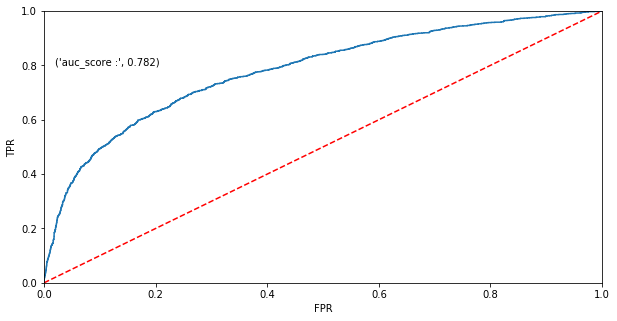

In [130]:
from sklearn.metrics import roc_curve,roc_auc_score

plt.figure(figsize=(10,5))
ypred_prob_xgb=xgb_model2.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob_xgb[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob_xgb[:,1]),3)))
plt.show()

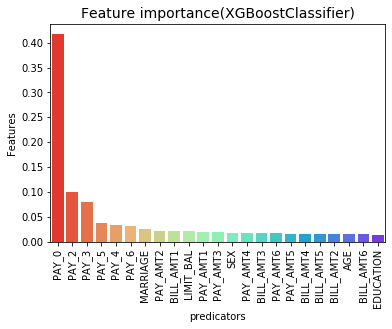

In [131]:
imp_features=pd.DataFrame({'predicators':xtrain.columns,'Features':xgb_model2.feature_importances_})
imp_features=imp_features.sort_values(by='Features',ascending=False)

sns.barplot(x=imp_features['predicators'],y=imp_features['Features'],palette='rainbow_r')
plt.xticks(rotation=90)
plt.title('Feature importance(XGBoostClassifier)',fontsize=14)
plt.show()

Interpretation:
    
    
  * `PAY_0`,`PAY_2`,`PAY_3`,`PAY_5`,`PAY_4`,`PAY_6`,`MARRIAGE` These are the main features.

In [134]:
cohen_kappa_score(ytest,ypred_xgb2)

0.3916736319595264

Interpretation:
    
    * Cohen kappa score for XGBoostClassifier is increased compared to previous Cohen's kappa score of RandomForestClassifier.But it also say that fair agreement between actual and predicted outputs.

In [265]:
XGBoostClassifier_hyperparameter = pd.Series({
                     'Model_Name': "XGBoostClassifier",
                     'Accuracy_score':accuracy_score(ytest,ypred_xgb2),
                     'F1_score':f1_score(ytest,ypred_xgb2) ,
                     'AUC score':round(roc_auc_score(ytest,ypred_prob_xgb[:,1]),3) })
       
                  

score_card = score_card.append(XGBoostClassifier_hyperparameter, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.7255,0.499240,0.749
1,XGBoostClassifier,0.8210,0.490995,0.782


#### Stacking Classifier

In [ ]:
#model-7 stacking model-1

In [154]:
#Build a model using RandomForestClassifier as a meta learner

from sklearn.ensemble import StackingClassifier

level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier()))
level_0.append(('cart', DecisionTreeClassifier()))
level_0.append(('bayes', GaussianNB()))
level_0.append(('svc', SVC()))

# define meta learner model
level_1 = RandomForestClassifier()

# define the stacking ensemble
stacking_model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [155]:
stacking_model.fit(xtrain_smote,ytrain_smote)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('bayes', GaussianNB()), ('svc', SVC())],
                   final_estimator=RandomForestClassifier())

In [156]:
print(classification_report(ytest,stacking_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4663
           1       0.38      0.41      0.39      1337

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



In [ ]:
#model-8 stacking model-2

In [165]:
#Build a model using XGBoostClasifier as a meta learner

from sklearn.ensemble import StackingClassifier

level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier()))
level_0.append(('cart', DecisionTreeClassifier()))
level_0.append(('bayes', GaussianNB()))
level_0.append(('svc', SVC()))

# define meta learner model
level_1 = XGBClassifier(random_state=20)

# define the stacking ensemble
stacking_model2 = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [168]:
stacking_model2.fit(xtrain_smote,ytrain_smote)

print(classification_report(ytest,stacking_model2.predict(xtest)))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4663
           1       0.38      0.40      0.39      1337

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



In [ ]:
#model-9 stacking model-3

In [173]:
#Consider tree based algorithms as  initial estimators
from sklearn.ensemble import StackingClassifier

level_0 = list()
level_0.append(('rf', RandomForestClassifier()))
level_0.append(('adb', AdaBoostClassifier()))
level_0.append(('gb', GradientBoostingClassifier()))
# define meta learner model
level_1 = XGBClassifier(random_state=20)

# define the stacking ensemble
stacking_model3 = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [174]:
stacking_model3.fit(xtrain_smote,ytrain_smote)

print(classification_report(ytest,stacking_model3.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4663
           1       0.51      0.47      0.49      1337

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.67      6000
weighted avg       0.77      0.78      0.78      6000



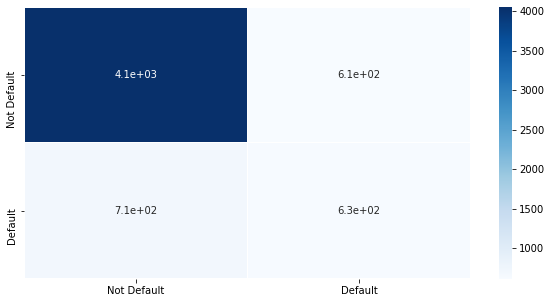

In [175]:
cm_stacking_model=confusion_matrix(ytest,stacking_model3.predict(xtest))

plt.figure(figsize=(10,5))
sns.heatmap(cm_stacking_model,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

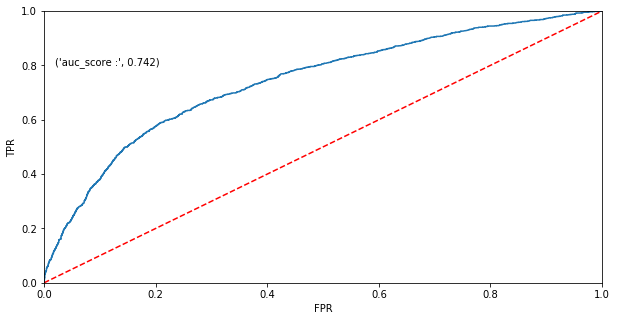

In [176]:
plt.figure(figsize=(10,5))
ypred_prob_stack3=stacking_model3.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob_stack3[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob_stack3[:,1]),3)))
plt.show()

In [178]:
print('Cohens kappa score for stacking classifier is :',cohen_kappa_score(ytest,stacking_model3.predict(xtest)))

Cohens kappa score for stacking classifier is : 0.3470948107958852


In [266]:
StackingClassifier = pd.Series({
                     'Model_Name': "StackingClassifier",
                     'Accuracy_score':accuracy_score(ytest,stacking_model3.predict(xtest)),
                     'F1_score':f1_score(ytest,stacking_model3.predict(xtest)) ,
                     'AUC score':round(roc_auc_score(ytest,ypred_prob_stack3[:,1]),3) })
       
                  

score_card = score_card.append(StackingClassifier, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.725500,0.499240,0.749
1,XGBoostClassifier,0.821000,0.490995,0.782
2,StackingClassifier,0.779833,0.486990,0.742


#### Voting Classifier

In [ ]:
#model-10 Voting classifier-1(hard)

In [180]:
from sklearn.ensemble import VotingClassifier

level_0 = list()
level_0.append(('rf', RandomForestClassifier()))
level_0.append(('adb', AdaBoostClassifier()))
level_0.append(('gb', GradientBoostingClassifier()))

# define meta learner model
level_1 = XGBClassifier(random_state=20)

voting_hard=VotingClassifier(estimators=level_0,voting='hard')
voting_hard.fit(xtrain_smote,ytrain_smote)


print(classification_report(ytest,voting_hard.predict(xtest)))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4663
           1       0.48      0.57      0.52      1337

    accuracy                           0.77      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.77      0.77      6000



In [ ]:
#model-11 Voting classifier-2 (hard)

In [181]:
level_0 = list()
level_0.append(('rf', RandomForestClassifier()))
level_0.append(('adb', AdaBoostClassifier()))
level_0.append(('gb', GradientBoostingClassifier()))
level_0.append(('xgb', XGBClassifier()))

# define meta learner model
level_1 = XGBClassifier(random_state=20)

voting_hard2=VotingClassifier(estimators=level_0,voting='hard')
voting_hard2.fit(xtrain_smote,ytrain_smote)


print(classification_report(ytest,voting_hard2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4663
           1       0.53      0.51      0.52      1337

    accuracy                           0.79      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.79      0.79      0.79      6000



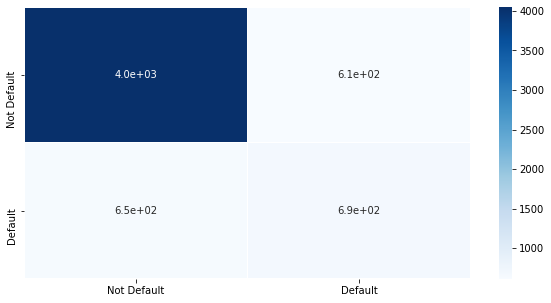

In [182]:
cm_voting_model=confusion_matrix(ytest,voting_hard2.predict(xtest))

plt.figure(figsize=(10,5))
sns.heatmap(cm_voting_model,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

In [ ]:
#model-12 Voting classifier-3 (soft)

In [186]:
level_0 = list()
level_0.append(('rf', RandomForestClassifier()))
level_0.append(('adb', AdaBoostClassifier()))
level_0.append(('gb', GradientBoostingClassifier()))
level_0.append(('xgb', XGBClassifier()))

voting_soft=VotingClassifier(estimators=level_0,voting='soft')
voting_soft.fit(xtrain_smote,ytrain_smote)


print(classification_report(ytest,voting_soft.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4663
           1       0.52      0.53      0.52      1337

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



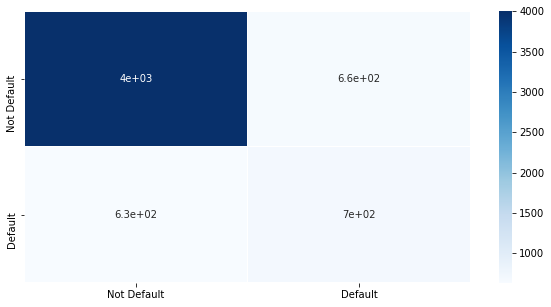

In [188]:
#plot confusion matrix
cm_voting_model_soft=confusion_matrix(ytest,voting_soft.predict(xtest))

plt.figure(figsize=(10,5))
sns.heatmap(cm_voting_model_soft,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

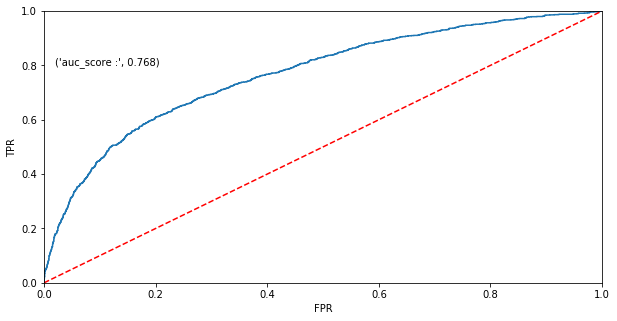

In [187]:
#Plot area under curve
plt.figure(figsize=(10,5))
ypred_prob_vote=voting_soft.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob_vote[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob_vote[:,1]),3)))
plt.show()

In [189]:
print('Cohens kappa score for voting classifier(soft) is :',cohen_kappa_score(ytest,voting_soft.predict(xtest)))

Cohens kappa score for voting classifier(soft) is : 0.38130361637193255


In [267]:
VotingClassifier = pd.Series({
                     'Model_Name': "VotingClassifier(Soft)",
                     'Accuracy_score':accuracy_score(ytest,voting_soft.predict(xtest)),
                     'F1_score':f1_score(ytest,voting_soft.predict(xtest)) ,
                     'AUC score':round(roc_auc_score(ytest,ypred_prob_vote[:,1]),3) })
       
                  

score_card = score_card.append(VotingClassifier, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.725500,0.499240,0.749
1,XGBoostClassifier,0.821000,0.490995,0.782
2,StackingClassifier,0.779833,0.486990,0.742
3,VotingClassifier(Soft),0.784167,0.520548,0.768


#### LGBMClassifier

In [ ]:
#model-13 - base model for LGBMClassifier

In [193]:
!pip install lightgbm

In [197]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier()
lgbm_clf.fit(xtrain,ytrain)

LGBMClassifier()

In [198]:
#Check all metrics
print(classification_report(ytest,lgbm_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.68      0.37      0.48      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



#### LGBMClassifier-Hyperparameter Tuning

In [ ]:
#model-14 LGBMclassifier model with hyperparameter tuning-1

In [199]:
lgbm_clf1=LGBMClassifier(boosting_type='gbdt',num_leaves=50,max_depth=-2,learning_rate=0.2,n_estimators=200,
                        class_weight='balanced',min_split_gain=1,min_child_weight=0.01,min_child_samples=30,
                        reg_alpha=10,reg_lambda=0.01,subsample=1,random_state=20)
lgbm_clf1.fit(xtrain,ytrain)

LGBMClassifier(class_weight='balanced', learning_rate=0.2, max_depth=-2,
               min_child_samples=30, min_child_weight=0.01, min_split_gain=1,
               n_estimators=200, num_leaves=50, random_state=20, reg_alpha=10,
               reg_lambda=0.01, subsample=1)

In [200]:
print(classification_report(ytest,lgbm_clf1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      4663
           1       0.47      0.65      0.54      1337

    accuracy                           0.76      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [ ]:
#model-15 LGBMclassifier model with hyperparameter tuning-2

In [234]:
lgbm_clf2=LGBMClassifier(boosting_type='gbdt',num_leaves=40,max_depth=8,learning_rate=0.3,n_estimators=500,
                        class_weight='balanced',min_split_gain=4,min_child_weight=0.01,min_child_samples=40,
                        reg_alpha=12,reg_lambda=0.1,subsample=1,random_state=20)
lgbm_clf2.fit(xtrain,ytrain)
print(classification_report(ytest,lgbm_clf2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4663
           1       0.47      0.66      0.55      1337

    accuracy                           0.76      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.80      0.76      0.77      6000



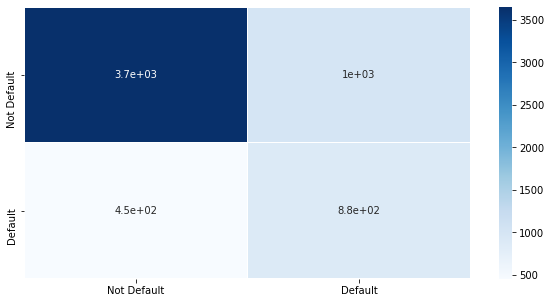

In [235]:
#plot confusion matrix
cm_lgbm_model=confusion_matrix(ytest,lgbm_clf2.predict(xtest))

plt.figure(figsize=(10,5))
sns.heatmap(cm_lgbm_model,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

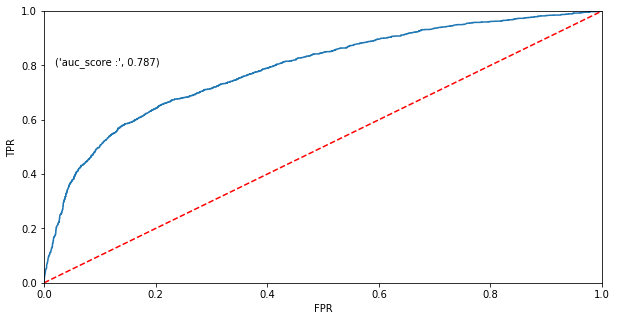

In [236]:
#Plot Area under curve
plt.figure(figsize=(10,5))
ypred_prob_lgbm=lgbm_clf2.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob_lgbm[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob_lgbm[:,1]),3)))
plt.show()

In [237]:
print('Cohens kappa score for LGBM classifier is :',cohen_kappa_score(ytest,lgbm_clf2.predict(xtest)))

Cohens kappa score for LGBM classifier is : 0.3865115513086287


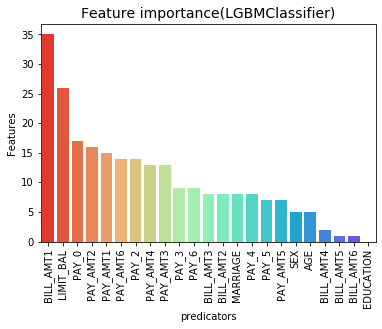

In [239]:
imp_features=pd.DataFrame({'predicators':xtrain.columns,'Features':lgbm_clf2.feature_importances_})
imp_features=imp_features.sort_values(by='Features',ascending=False)

sns.barplot(x=imp_features['predicators'],y=imp_features['Features'],palette='rainbow_r')
plt.xticks(rotation=90)
plt.title('Feature importance(LGBMClassifier)',fontsize=14)
plt.show()

Interpretation:
    

*  `BILL_AMT1`,`LIMIT_BAL`,`PAY_0`,`PAY_0`,`PAY_AMT2`,`PAY_AMT1`,`PAY_AMT6`,`PAY_2`,`PAY_AMT4`,`PAY_AMT3`,
`PAY_3`,`PAY_6`,`BILL_AMT3`,`BILL_AMT2`,`MARRIAGE`,`PAY_4`,`PAY_5`,`PAY_AMT5`,`SEX`,`AGE`   These are the main features for good predictions of class.

In [268]:
LGBMClassifier = pd.Series({
                     'Model_Name': "LGBMClassifier",
                     'Accuracy_score':accuracy_score(ytest,lgbm_clf2.predict(xtest)),
                     'F1_score':f1_score(ytest,lgbm_clf2.predict(xtest)) ,
                     'AUC score':round(roc_auc_score(ytest,ypred_prob_lgbm[:,1]),3) })
       
                  

score_card = score_card.append(LGBMClassifier, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.725500,0.499240,0.749
1,XGBoostClassifier,0.821000,0.490995,0.782
2,StackingClassifier,0.779833,0.486990,0.742
3,VotingClassifier(Soft),0.784167,0.520548,0.768
4,LGBMClassifier,0.756000,0.546749,0.787


#### CatBoostClassifier

In [241]:
!pip install catboost

In [ ]:
# model-16 -base model for CatBoostClassifier

In [247]:
from catboost import CatBoostClassifier

cb_clf=CatBoostClassifier(random_state=20,learning_rate=0.04)
cb_clf.fit(xtrain,ytrain)
#Check all metrics


0:	learn: 0.6707340	total: 30.6ms	remaining: 30.6s
1:	learn: 0.6498757	total: 59.4ms	remaining: 29.6s
2:	learn: 0.6310303	total: 85.7ms	remaining: 28.5s
3:	learn: 0.6135996	total: 121ms	remaining: 30.2s
4:	learn: 0.5980762	total: 153ms	remaining: 30.4s
5:	learn: 0.5845144	total: 184ms	remaining: 30.5s
6:	learn: 0.5719096	total: 211ms	remaining: 29.9s
7:	learn: 0.5598652	total: 243ms	remaining: 30.1s
8:	learn: 0.5489304	total: 275ms	remaining: 30.3s
9:	learn: 0.5388802	total: 301ms	remaining: 29.8s
10:	learn: 0.5299600	total: 331ms	remaining: 29.8s
11:	learn: 0.5219085	total: 363ms	remaining: 29.9s
12:	learn: 0.5143786	total: 393ms	remaining: 29.8s
13:	learn: 0.5075243	total: 423ms	remaining: 29.8s
14:	learn: 0.5014390	total: 451ms	remaining: 29.6s
15:	learn: 0.4955421	total: 480ms	remaining: 29.5s
16:	learn: 0.4902610	total: 509ms	remaining: 29.4s
17:	learn: 0.4857166	total: 544ms	remaining: 29.7s
18:	learn: 0.4811068	total: 578ms	remaining: 29.8s
19:	learn: 0.4769963	total: 609ms	rema

161:	learn: 0.4137060	total: 5.09s	remaining: 26.3s
162:	learn: 0.4135704	total: 5.12s	remaining: 26.3s
163:	learn: 0.4135203	total: 5.14s	remaining: 26.2s
164:	learn: 0.4134278	total: 5.18s	remaining: 26.2s
165:	learn: 0.4133573	total: 5.21s	remaining: 26.2s
166:	learn: 0.4132835	total: 5.24s	remaining: 26.1s
167:	learn: 0.4131577	total: 5.28s	remaining: 26.1s
168:	learn: 0.4130253	total: 5.3s	remaining: 26.1s
169:	learn: 0.4129287	total: 5.34s	remaining: 26.1s
170:	learn: 0.4128099	total: 5.37s	remaining: 26s
171:	learn: 0.4127678	total: 5.4s	remaining: 26s
172:	learn: 0.4126827	total: 5.42s	remaining: 25.9s
173:	learn: 0.4125777	total: 5.47s	remaining: 26s
174:	learn: 0.4125141	total: 5.5s	remaining: 25.9s
175:	learn: 0.4124344	total: 5.52s	remaining: 25.9s
176:	learn: 0.4123590	total: 5.55s	remaining: 25.8s
177:	learn: 0.4122472	total: 5.57s	remaining: 25.7s
178:	learn: 0.4121687	total: 5.6s	remaining: 25.7s
179:	learn: 0.4120871	total: 5.62s	remaining: 25.6s
180:	learn: 0.4120269	

320:	learn: 0.3984182	total: 9.92s	remaining: 21s
321:	learn: 0.3983229	total: 9.95s	remaining: 20.9s
322:	learn: 0.3981833	total: 9.98s	remaining: 20.9s
323:	learn: 0.3981086	total: 10s	remaining: 20.9s
324:	learn: 0.3979586	total: 10s	remaining: 20.8s
325:	learn: 0.3978720	total: 10.1s	remaining: 20.8s
326:	learn: 0.3977576	total: 10.1s	remaining: 20.8s
327:	learn: 0.3976556	total: 10.1s	remaining: 20.8s
328:	learn: 0.3974896	total: 10.2s	remaining: 20.7s
329:	learn: 0.3974031	total: 10.2s	remaining: 20.7s
330:	learn: 0.3973587	total: 10.2s	remaining: 20.7s
331:	learn: 0.3972951	total: 10.2s	remaining: 20.6s
332:	learn: 0.3972233	total: 10.3s	remaining: 20.6s
333:	learn: 0.3971521	total: 10.3s	remaining: 20.6s
334:	learn: 0.3970196	total: 10.3s	remaining: 20.5s
335:	learn: 0.3968708	total: 10.4s	remaining: 20.5s
336:	learn: 0.3967833	total: 10.4s	remaining: 20.4s
337:	learn: 0.3966388	total: 10.4s	remaining: 20.4s
338:	learn: 0.3965769	total: 10.4s	remaining: 20.4s
339:	learn: 0.3964

479:	learn: 0.3825307	total: 14.6s	remaining: 15.8s
480:	learn: 0.3824065	total: 14.7s	remaining: 15.8s
481:	learn: 0.3823237	total: 14.7s	remaining: 15.8s
482:	learn: 0.3822457	total: 14.7s	remaining: 15.8s
483:	learn: 0.3821500	total: 14.8s	remaining: 15.7s
484:	learn: 0.3820431	total: 14.8s	remaining: 15.7s
485:	learn: 0.3819893	total: 14.8s	remaining: 15.7s
486:	learn: 0.3819212	total: 14.8s	remaining: 15.6s
487:	learn: 0.3818416	total: 14.9s	remaining: 15.6s
488:	learn: 0.3817689	total: 14.9s	remaining: 15.6s
489:	learn: 0.3817143	total: 14.9s	remaining: 15.5s
490:	learn: 0.3815992	total: 15s	remaining: 15.5s
491:	learn: 0.3815469	total: 15s	remaining: 15.5s
492:	learn: 0.3815053	total: 15s	remaining: 15.5s
493:	learn: 0.3813828	total: 15.1s	remaining: 15.4s
494:	learn: 0.3812617	total: 15.1s	remaining: 15.4s
495:	learn: 0.3811789	total: 15.1s	remaining: 15.3s
496:	learn: 0.3810908	total: 15.1s	remaining: 15.3s
497:	learn: 0.3809693	total: 15.2s	remaining: 15.3s
498:	learn: 0.3808

642:	learn: 0.3687342	total: 19.4s	remaining: 10.8s
643:	learn: 0.3686354	total: 19.5s	remaining: 10.8s
644:	learn: 0.3685630	total: 19.5s	remaining: 10.7s
645:	learn: 0.3684881	total: 19.5s	remaining: 10.7s
646:	learn: 0.3684037	total: 19.5s	remaining: 10.7s
647:	learn: 0.3683457	total: 19.6s	remaining: 10.6s
648:	learn: 0.3682390	total: 19.6s	remaining: 10.6s
649:	learn: 0.3681593	total: 19.6s	remaining: 10.6s
650:	learn: 0.3680956	total: 19.7s	remaining: 10.5s
651:	learn: 0.3679859	total: 19.7s	remaining: 10.5s
652:	learn: 0.3679425	total: 19.7s	remaining: 10.5s
653:	learn: 0.3678800	total: 19.7s	remaining: 10.4s
654:	learn: 0.3677801	total: 19.8s	remaining: 10.4s
655:	learn: 0.3677420	total: 19.8s	remaining: 10.4s
656:	learn: 0.3676537	total: 19.8s	remaining: 10.4s
657:	learn: 0.3676032	total: 19.9s	remaining: 10.3s
658:	learn: 0.3675088	total: 19.9s	remaining: 10.3s
659:	learn: 0.3673730	total: 19.9s	remaining: 10.3s
660:	learn: 0.3673156	total: 19.9s	remaining: 10.2s
661:	learn: 

807:	learn: 0.3560159	total: 24.3s	remaining: 5.78s
808:	learn: 0.3559686	total: 24.4s	remaining: 5.75s
809:	learn: 0.3559008	total: 24.4s	remaining: 5.72s
810:	learn: 0.3558263	total: 24.4s	remaining: 5.69s
811:	learn: 0.3557432	total: 24.5s	remaining: 5.66s
812:	learn: 0.3556917	total: 24.5s	remaining: 5.63s
813:	learn: 0.3556495	total: 24.5s	remaining: 5.6s
814:	learn: 0.3555662	total: 24.6s	remaining: 5.57s
815:	learn: 0.3554739	total: 24.6s	remaining: 5.54s
816:	learn: 0.3553764	total: 24.6s	remaining: 5.51s
817:	learn: 0.3552657	total: 24.6s	remaining: 5.48s
818:	learn: 0.3551533	total: 24.7s	remaining: 5.45s
819:	learn: 0.3550401	total: 24.7s	remaining: 5.42s
820:	learn: 0.3549688	total: 24.7s	remaining: 5.39s
821:	learn: 0.3548927	total: 24.8s	remaining: 5.36s
822:	learn: 0.3548405	total: 24.8s	remaining: 5.33s
823:	learn: 0.3547687	total: 24.8s	remaining: 5.3s
824:	learn: 0.3546993	total: 24.8s	remaining: 5.27s
825:	learn: 0.3546219	total: 24.9s	remaining: 5.24s
826:	learn: 0.

970:	learn: 0.3435722	total: 29.3s	remaining: 875ms
971:	learn: 0.3435090	total: 29.3s	remaining: 845ms
972:	learn: 0.3434153	total: 29.4s	remaining: 815ms
973:	learn: 0.3433701	total: 29.4s	remaining: 785ms
974:	learn: 0.3432955	total: 29.4s	remaining: 755ms
975:	learn: 0.3432562	total: 29.5s	remaining: 724ms
976:	learn: 0.3432045	total: 29.5s	remaining: 694ms
977:	learn: 0.3430898	total: 29.5s	remaining: 664ms
978:	learn: 0.3430320	total: 29.6s	remaining: 634ms
979:	learn: 0.3429652	total: 29.6s	remaining: 604ms
980:	learn: 0.3428914	total: 29.6s	remaining: 573ms
981:	learn: 0.3428333	total: 29.6s	remaining: 543ms
982:	learn: 0.3427580	total: 29.7s	remaining: 513ms
983:	learn: 0.3427245	total: 29.7s	remaining: 483ms
984:	learn: 0.3426850	total: 29.7s	remaining: 453ms
985:	learn: 0.3426215	total: 29.8s	remaining: 422ms
986:	learn: 0.3425188	total: 29.8s	remaining: 392ms
987:	learn: 0.3424617	total: 29.8s	remaining: 362ms
988:	learn: 0.3423708	total: 29.8s	remaining: 332ms
989:	learn: 

In [248]:
print(classification_report(ytest,cb_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4663
           1       0.66      0.39      0.49      1337

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



#### CatBoostClassifier-Hyperparameter tuning

In [ ]:
#model-17 CatBoostclassifier with hyperparameter 

In [253]:
from sklearn.model_selection import GridSearchCV
CBC = CatBoostClassifier() 
parameters = {'depth' : [4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90,100]
                 }

Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(xtrain, ytrain)

0:	learn: 0.6818581	total: 445ms	remaining: 35.1s
1:	learn: 0.6708319	total: 487ms	remaining: 19s
2:	learn: 0.6604714	total: 550ms	remaining: 14.1s
3:	learn: 0.6503294	total: 595ms	remaining: 11.3s
4:	learn: 0.6406929	total: 732ms	remaining: 11s
5:	learn: 0.6313967	total: 770ms	remaining: 9.49s
6:	learn: 0.6227496	total: 811ms	remaining: 8.45s
7:	learn: 0.6146102	total: 849ms	remaining: 7.64s
8:	learn: 0.6065761	total: 927ms	remaining: 7.32s
9:	learn: 0.5986397	total: 974ms	remaining: 6.82s
10:	learn: 0.5913814	total: 1.02s	remaining: 6.38s
11:	learn: 0.5845343	total: 1.06s	remaining: 5.99s
12:	learn: 0.5782541	total: 1.1s	remaining: 5.69s
13:	learn: 0.5722094	total: 1.18s	remaining: 5.54s
14:	learn: 0.5661172	total: 1.27s	remaining: 5.5s
15:	learn: 0.5602357	total: 1.33s	remaining: 5.32s
16:	learn: 0.5547971	total: 1.38s	remaining: 5.11s
17:	learn: 0.5496276	total: 1.42s	remaining: 4.89s
18:	learn: 0.5446117	total: 1.47s	remaining: 4.72s
19:	learn: 0.5397959	total: 1.52s	remaining: 4.

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001ABB7661748>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [254]:
Grid_CBC.best_params_

{'depth': 6, 'iterations': 80, 'learning_rate': 0.02}

In [255]:
CB_clf1=CatBoostClassifier(depth=6,learning_rate=0.02,iterations=80,random_state=20)
CB_clf1.fit(xtrain, ytrain)

0:	learn: 0.6817917	total: 138ms	remaining: 10.9s
1:	learn: 0.6707253	total: 231ms	remaining: 9.02s
2:	learn: 0.6601399	total: 307ms	remaining: 7.87s
3:	learn: 0.6502872	total: 432ms	remaining: 8.21s
4:	learn: 0.6409083	total: 521ms	remaining: 7.81s
5:	learn: 0.6321969	total: 597ms	remaining: 7.36s
6:	learn: 0.6237257	total: 665ms	remaining: 6.93s
7:	learn: 0.6152758	total: 732ms	remaining: 6.59s
8:	learn: 0.6072160	total: 794ms	remaining: 6.26s
9:	learn: 0.5995019	total: 860ms	remaining: 6.02s
10:	learn: 0.5921420	total: 915ms	remaining: 5.74s
11:	learn: 0.5853434	total: 980ms	remaining: 5.55s
12:	learn: 0.5788865	total: 1.06s	remaining: 5.48s
13:	learn: 0.5724029	total: 1.13s	remaining: 5.33s
14:	learn: 0.5664872	total: 1.2s	remaining: 5.22s
15:	learn: 0.5606452	total: 1.27s	remaining: 5.09s
16:	learn: 0.5551678	total: 1.36s	remaining: 5.04s
17:	learn: 0.5500755	total: 1.44s	remaining: 4.95s
18:	learn: 0.5450213	total: 1.49s	remaining: 4.79s
19:	learn: 0.5401430	total: 1.54s	remainin

In [257]:
print(classification_report(ytest,CB_clf1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.68      0.36      0.48      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



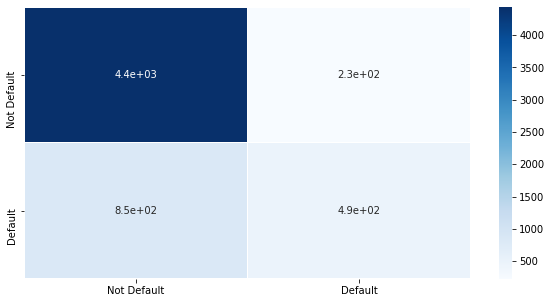

In [258]:
#plot confusion matrix
cm_lgbm1_model=confusion_matrix(ytest,CB_clf1.predict(xtest))

plt.figure(figsize=(10,5))
sns.heatmap(cm_lgbm1_model,
           xticklabels=['Not Default', 'Default'],
           yticklabels=['Not Default', 'Default'],annot=True,linewidth=0.2,cmap='Blues')

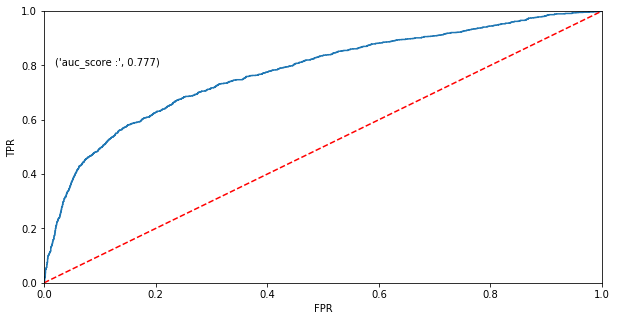

In [259]:
#Plot Area under curve
plt.figure(figsize=(10,5))
ypred_prob_CB_clf=CB_clf1.predict_proba(xtest)
fpr,tpr,thresold=roc_curve(ytest,ypred_prob_CB_clf[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.02,y=0.8,s=('auc_score :',round(roc_auc_score(ytest,ypred_prob_CB_clf[:,1]),3)))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [260]:
print('Cohens kappa score for CatBoost classifier is :',cohen_kappa_score(ytest,CB_clf1.predict(xtest)))

Cohens kappa score for CatBoost classifier is : 0.37961465702212727


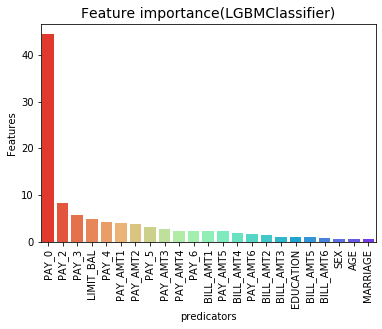

In [261]:
imp_features=pd.DataFrame({'predicators':xtrain.columns,'Features':CB_clf1.feature_importances_})
imp_features=imp_features.sort_values(by='Features',ascending=False)

sns.barplot(x=imp_features['predicators'],y=imp_features['Features'],palette='rainbow_r')
plt.xticks(rotation=90)
plt.title('Feature importance(LGBMClassifier)',fontsize=14)
plt.show()

Interpretation:
    
   
   *  `PAY_0`, `PAY_2`, `PAY_3`, `LIMIT_BAL`,`PAY_4`,`PAY_AMT1`,`PAY_AMT2`,`PAY_5`,`PAY_AMT3`,`PAY_AMT4`,`PAY_6`,`BILL_AMT1` These are the main features.

In [263]:
CatBoostClassifier = pd.Series({
                     'Model_Name': "CatBoostClassifier",
                     'Accuracy_score':accuracy_score(ytest,CB_clf1.predict(xtest)),
                     'F1_score':f1_score(ytest,CB_clf1.predict(xtest)) ,
                     'AUC score':round(roc_auc_score(ytest,ypred_prob_CB_clf[:,1]),3) })
       
                  

score_card = score_card.append(CatBoostClassifier, ignore_index=True)


score_card

,Model_Name,Accuracy_score,F1_score,AUC score
0,RandomForestClassifier,0.725500,0.499240,0.749
1,XGBoostClassifier,0.821000,0.490995,0.782
2,StackingClassifier,0.779833,0.486990,0.742
3,VotingClassifier(Soft),0.784167,0.520548,0.768
4,LGBMClassifier(Soft),0.756000,0.546749,0.787
5,CatBoostClassifier,0.820833,0.475865,0.777


## Conclusion:


   * Initailly we built models based on LogisticRegression,GaussianNB,KNN,DecisionTree and SVM.. These models gives low accuracys score and F1 score.
   
   * So we next shifted to bagging and boosting techinques.. From these models we got good accuracy score and f1 score.
   
   * Among all the bagging and boosting techniques `LGBMClassifier` gives best score[i.e. Accuracy_score :0.756,F1 score=0.54, and AUC score =0.787].
   
   * `BILL_AMT1`,`LIMIT_BAL`,`PAY_0`,`PAY_0`,`PAY_AMT2``,PAY_AMT1`,`PAY_AMT6`,`PAY_2`,`PAY_AMT4`,`PAY_AMT3`, `PAY_3`,`PAY_6`,`BILL_AMT3`,`BILL_AMT2`,`MARRIAGE`,`PAY_4`,`PAY_5`,`PAY_AMT5`,`SEX`,`AGE` These are the main features for good predictions of classes.
   

                                          ------- Thank You --------

In [ ]:
#https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/